In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [102]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [103]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func


In [104]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [105]:
# reflect an existing database into a new model
base = automap_base()
# reflect the tables
base.prepare(autoload_with=engine)

In [106]:
# View all of the classes that automap found
base.classes.keys()

['measurement', 'station']

In [107]:
# Save references to each table
measurement = base.classes.measurement

station = base.classes.station

In [108]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [109]:
# Find the most recent date in the data set.
session.query(measurement.date).order_by(measurement.date.desc()).first()

('2017-08-23',)

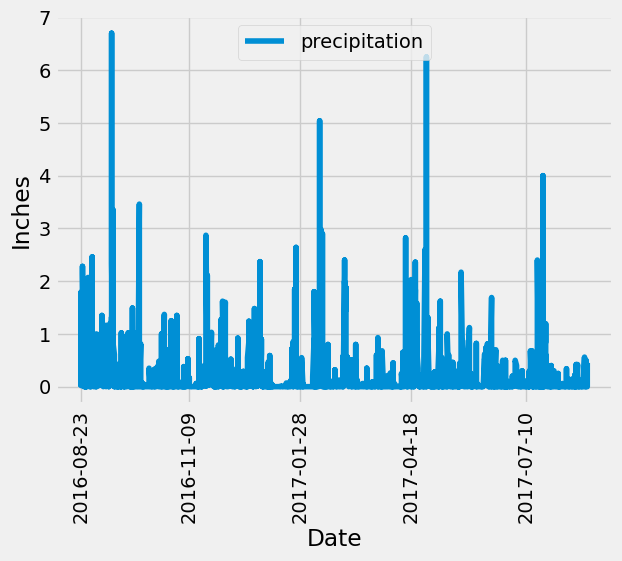

In [177]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
end_date = session.query(measurement.date).order_by(measurement.date.desc()).first()[0]
# Calculate the date one year from the last date in data set.
date = dt.datetime.strptime(end_date, '%Y-%m-%d')
date = date.date()

start_date = date - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
final_year_data = session.query(measurement.date, measurement.prcp).filter(measurement.date >= start_date)

# Save the query results as a Pandas DataFrame. Explicitly set the column names
precip_df = pd.DataFrame(final_year_data, columns = ['Date', 'precipitation'])
precip_df

# Sort the dataframe by date
precip_df = precip_df.sort_values(by='Date').dropna()

# Use Pandas Plotting with Matplotlib to plot the data
plt.plot(precip_df['Date'],precip_df['precipitation'], label='precipitation')
plt.xticks(['2016-08-23', '2016-11-09', '2017-01-28', '2017-04-18', '2017-07-10'], rotation=90)
plt.xlabel('Date')
plt.ylabel('Inches')
plt.legend(loc='upper center')
plt.show()

In [178]:
# Use Pandas to calculate the summary statistics for the precipitation data
precip_df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [179]:
# Design a query to calculate the total number of stations in the dataset
session.query(measurement.station).distinct().count()

9

In [180]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
session.query(measurement.station, func.count(measurement.station)).\
    group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [181]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
session.query(func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs)).\
    filter(measurement.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

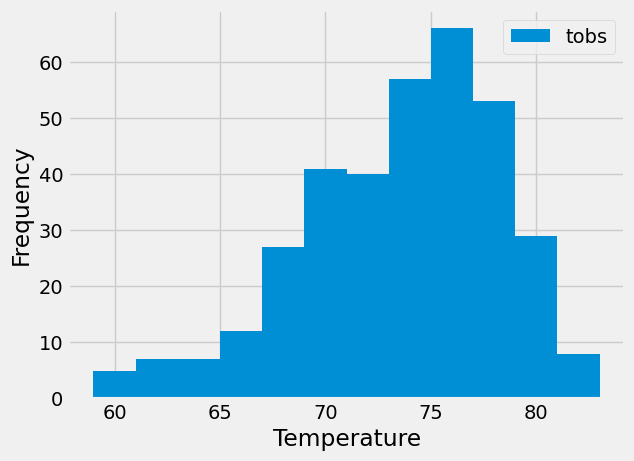

In [190]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
active_station_info = session.query(measurement.tobs).filter(measurement.date >= start_date).\
    filter(measurement.station == 'USC00519281').all()

station_pd = pd.DataFrame(active_station_info)
station_pd.plot.hist(bins=12)
plt.xlabel('Temperature')
plt.show()

# Close Session

In [16]:
# Close Session
session.close()